# Data Science I Topic 2 - Exploratory Data Analysis

In [1]:
# Run this cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Summary Statistics

<u>We will use again the ml-latest-small.zip from [MovieLens Latest Datasets](https://grouplens.org/datasets/movielens/latest/) that we've seen before in T2-PandasBasic.<br>
Let's first look at `ratings.csv`.<u>

In [2]:
# Run this cell
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df["time"] = pd.to_datetime(ratings_df.timestamp, unit='s')
ratings_df = ratings_df.drop(columns="timestamp")
ratings_df.head(3)

,userId,movieId,rating,time
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04


### Summarizing numerical data

<u>Complete the following cells. Use any of the followings methods appropriately:</u>

`.mean()`, `.median()`, `.mode()`, `.min()`, `.max()`, `.var()`, `.std()`, `.sum()`, `.quantile()`

In [3]:
# Average of ratings
ratings_df.rating.mean()

3.501556983616962

In [4]:
# median
ratings_df.rating.median()

3.5

In [5]:
# most frequent
ratings_df.rating.mode()

# Note that .mode() will return a series, which means the index will also be shown.

0    4.0
dtype: float64

In [6]:
# lowest
ratings_df.rating.min()

0.5

In [7]:
# highest
ratings_df.rating.max()

5.0

### Summarizing dates

In [8]:
# Try it: Show the earliest rating timestamp
ratings_df.time.min()

Timestamp('1996-03-29 18:36:55')

In [9]:
# Show the latest rating timestamp
ratings_df.time.max()

Timestamp('2018-09-24 14:27:30')

### Counting categorical variables

<u>Say we want to count how many ratings are available for each movieId.</u>

In [10]:
# sorted count, from the most rated movie
ratings_df.movieId.value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

<u>We observed that the movieId 356 is the most rated movie with 329 users rated it.<br>
Which user (userID) gives ratings most frequently? Find it out below.</u>

In [11]:
# sorted count, from the most frequent rater
ratings_df.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

### Grouped summary statistics

<u>Say we want to find out the average rating given by each user.</u>

In [12]:
# Using .groupby() to find stats per userId
mean_rating_per_user = ratings_df.groupby("userId").rating.mean()

print(mean_rating_per_user)

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64


<u>Now find out the mean rating of each movie</u>

In [13]:
# use .groupby() to find the average rating per movieId
mean_rating_per_movie = ratings_df.groupby("movieId").rating.mean()

print(mean_rating_per_movie)

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64


### Using `.agg()`

<u>Say we want to show some summary statistics (min, max, mean, median, count) at once for all available ratings.</u>

In [14]:
# summary statistics for all ratings
ratings_df.rating.agg(['min', 'max', 'mean', 'median', 'count'])

min            0.500000
max            5.000000
mean           3.501557
median         3.500000
count     100836.000000
Name: rating, dtype: float64

In [15]:
# Try it: now display min, max, mean, median, count ratings for:
# 1) each userId
# 2) each movieId
summary_rating_per_user = ratings_df.groupby("userId").rating.agg(['min', 'max', 'mean', 'median', 'count'])
print(summary_rating_per_user)

summary_rating_per_movie = ratings_df.groupby("movieId").rating.agg(['min', 'max', 'mean', 'median', 'count'])
print(summary_rating_per_movie)

        min  max      mean  median  count
userId                                   
1       1.0  5.0  4.366379     5.0    232
2       2.0  5.0  3.948276     4.0     29
3       0.5  5.0  2.435897     0.5     39
4       1.0  5.0  3.555556     4.0    216
5       1.0  5.0  3.636364     4.0     44
...     ...  ...       ...     ...    ...
606     0.5  5.0  3.657399     4.0   1115
607     1.0  5.0  3.786096     4.0    187
608     0.5  5.0  3.134176     3.0    831
609     3.0  4.0  3.270270     3.0     37
610     0.5  5.0  3.688556     3.5   1302

[610 rows x 5 columns]
         min  max      mean  median  count
movieId                                   
1        0.5  5.0  3.920930     4.0    215
2        0.5  5.0  3.431818     3.5    110
3        0.5  5.0  3.259615     3.0     52
4        1.0  3.0  2.357143     3.0      7
5        0.5  5.0  3.071429     3.0     49
...      ...  ...       ...     ...    ...
193581   4.0  4.0  4.000000     4.0      1
193583   3.5  3.5  3.500000     3.5      1


<u>We'll see more summary statistics in Topic 3: Descriptive Statistics.</u>

## Line Plots

<u>The dataset we will be using in this section is a small portion of the data from [WISDM Smartphone and Smartwatch Activity and Biometrics Dataset from UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/WISDM+Smartphone+and+Smartwatch+Activity+and+Biometrics+Dataset+).<br>
The data is already prepared for you in `accel_watch.csv`. Import this into a DataFrame called df.</u>

In [16]:
# Read the csv file
df = pd.read_csv('accel_watch.csv')

# Print the first few lines
df.head(3)

,timestamp,X,Y,Z
0,0.0,7.091625,-0.591667,8.195502
1,49.5,4.972757,-0.158317,6.696732
2,99.0,3.253720,-0.191835,6.107758


<u>There are four columns in this DataFrame:`timestamp` shows the time in ms, `X`, `Y`, and `Z `shows the sensor values (real valued) on the x-, y-, and z-axis, respectively, as recorded by the accelerometer from a smartwatch.</u>

### Line plot on a single axis

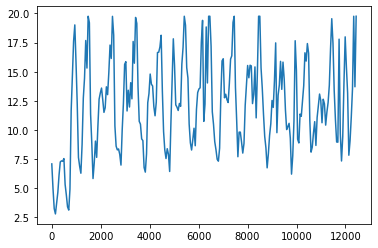

In [17]:
# first plot: X-axis against timestamp
plt.plot(df.timestamp, df.X) #What should be on the 1st and 2nd argument?
plt.show()

<u>Let's add a little more information to this plot.<br>Also try to modify your line plots by adding the following arguments</u>:
- `color`, where basic built-in colors are `'b'` for blue, `'g'` for green, `'r'` for red, `'c'` for cyan, `'m'` for magenta, `'y'` for yellow, `'k'` for black, and `'w'` for white,
    
- `marker`, [possible markers](https://matplotlib.org/3.1.1/api/markers_api.html)

- `linestyle`, possible styles: `'-'`, `'--'`, `'-.'`, `':'`, `'None'`, `' '`, `''`.

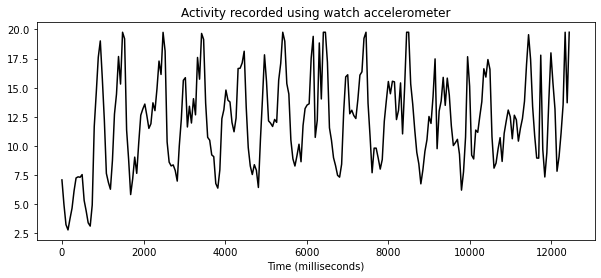

In [18]:
# Run this
plt.figure(figsize=(10,4))# Set figure size
plt.plot(df.timestamp, df.X, 'k-')
plt.title('Activity recorded using watch accelerometer')# add title
plt.xlabel('Time (milliseconds)')# add xlabel
plt.show()

### Adding multiple plots, labels, and legend

<u>Complete the following cell.</u>

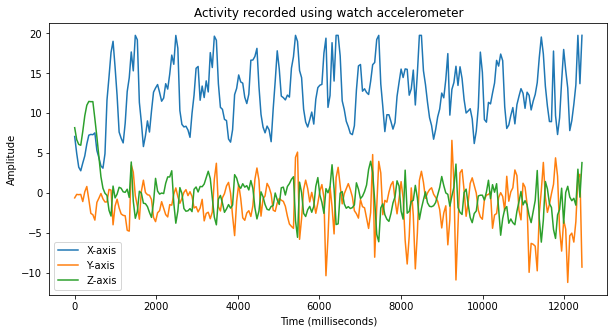

In [19]:
# Initialize figure with size=(10,5)
plt.figure(figsize=(10,5))

# first plot: X-axis against timestamp
plt.plot(df.timestamp, df.X, label='X-axis')

# add second plot: Y-axis against timestamp, give an appropriate label
plt.plot(df.timestamp, df.Y, label='Y-axis')

# add third plot: Z-axis against timestamp, give an appropriate label
plt.plot(df.timestamp, df.Z, label='Z-axis')

# Add title
plt.title('Activity recorded using watch accelerometer')

# x-axis label
plt.xlabel('Time (milliseconds)')

# add a y-axis label: Amplitude
plt.ylabel('Amplitude')

# add a legend
plt.legend()

plt.show()
# You should see three line plots!

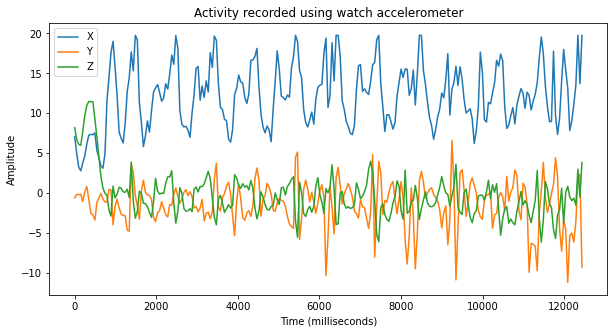

In [20]:
df2 = df.set_index("timestamp")
plt.figure(figsize=(10,5))
plt.plot(df2)
plt.title('Activity recorded using watch accelerometer')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.legend(('X', 'Y', 'Z'))
plt.show()

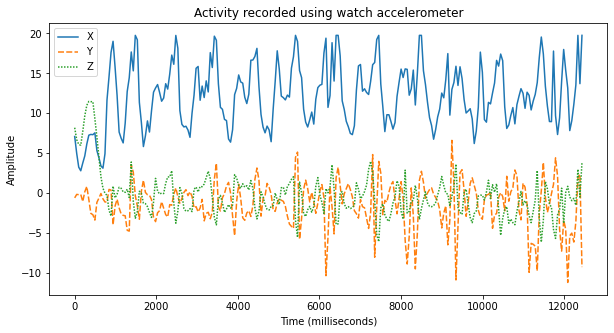

In [21]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df2)
ax.set(xlabel="Time (milliseconds)", ylabel="Amplitude", 
       title='Activity recorded using watch accelerometer')
plt.show()

### Using `.axes()`

<u>By using `.axes()`, we can control the absolute position and size of each figure, making it possible to overlay one figure over another.</u>

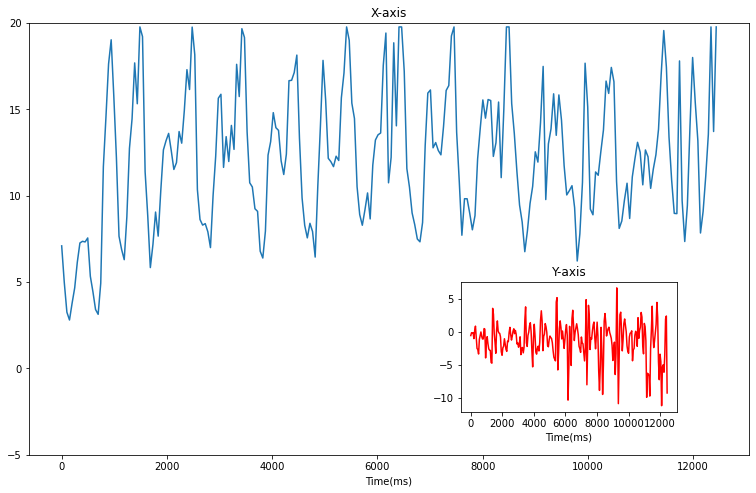

In [22]:
# change figure size
plt.figure(figsize=(10,6))

# axes([x_lo, y_lo, width, height]), between 0 and 1
plt.axes([0.1, 0.1, 1.0, 1.0]) 
plt.plot(df.timestamp, df.X)
plt.xlabel('Time(ms)')
plt.ylim([-5, 20])
plt.title('X-axis')

# Overlaying y-axis plot on x-axis
plt.axes([0.7, 0.2, 0.3, 0.3]) 
plt.plot(df.timestamp, df.Y, color='r')
plt.xlabel('Time(ms)')
plt.title('Y-axis')

plt.show()

<u>Try it: Using `.axes()`, arrange the **first 100 data points** of data from the three axes horizontally (three different plots on one row).</u>

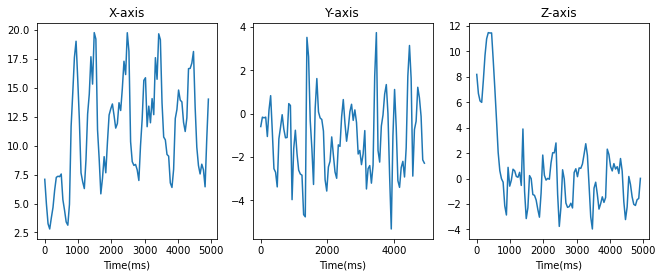

In [23]:
# set figure size
plt.figure(figsize=(10,3))

# Left to right
plt.axes([0.1, 0.05, 0.25, 1.0]) 
plt.plot(df.timestamp[0:100], df.X[0:100])
plt.xlabel('Time(ms)')
plt.title('X-axis')

# Y-axis
plt.axes([0.4, 0.05, 0.25, 1.0]) 
plt.plot(df.timestamp[0:100], df.Y[0:100])
plt.xlabel('Time(ms)')
plt.title('Y-axis')

# Z-axis
plt.axes([0.7, 0.05, 0.25, 1.0]) 
plt.plot(df.timestamp[0:100], df.Z[0:100])
plt.xlabel('Time(ms)')
plt.title('Z-axis')

# show the plot
#
plt.show()

### Using `subplot()`

<u>Continue the following to obtain three plots arranged horizontally.</u>

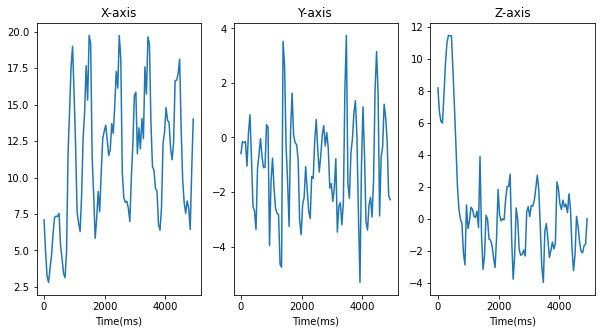

In [24]:
plt.figure(figsize=(10,5))

# nrows, ncols, nsubplot - row-wise from top left
# indexed from 1

# X-axis
plt.subplot(1,3,1) 
plt.plot(df.timestamp[0:100], df.X[0:100])
plt.xlabel('Time(ms)')
plt.title('X-axis')

# Y-axis
plt.subplot(1,3,2) 
plt.plot(df.timestamp[0:100], df.Y[0:100])
plt.xlabel('Time(ms)')
plt.title('Y-axis')

# Z-axis
plt.subplot(1,3,3) 
plt.plot(df.timestamp[0:100], df.Z[0:100])
plt.xlabel('Time(ms)')
plt.title('Z-axis')

plt.show()

## Categorical plots

<u>Let's go back to the MovieLens data set. So far we've dealt mostly with `ratings`, now we'll look at the information about the rated movies in `movies.csv`.</u>

In [25]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')
movies_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


<u>We want to extract the year and each genre for easy processing later on. Run the cell below. Don't worry about the details for now. Compare the resulting table with the `movies_df` before preprocessing.</u>

In [26]:
# Preprocessing
def extract_year(title):
    s = title[title.rfind("(")+1:title.rfind(")")]
    try:
        return int(s)
    except:
        return 0 #assign 0 if year was not given
    
def extract_genres(genre):
    return genre.split("|")

movies_prep = movies_df

# add column year
movies_prep["year"] = movies_prep.title.apply(extract_year)

genres_list = movies_prep.genres.apply(extract_genres)

# Get one-hot-encoding like
columns = ["Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
"Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "(no genres listed)"]
movies_prep = movies_prep.join(pd.get_dummies(genres_list.apply(pd.Series).stack(), columns=columns).sum(level=0))

movies_prep = movies_prep.drop(columns="genres")

movies_prep.head(2)

C:\Users\t-kun\AppData\Local\Temp/ipykernel_9832/1857540416.py:22: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  movies_prep = movies_prep.join(pd.get_dummies(genres_list.apply(pd.Series).stack(), columns=columns).sum(level=0))


,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<u>Recall in section **1.5** we created `summary_rating_per_movie`. We can join this DataFrame with `movies_prep` on the common `movieId`.</u>

In [27]:
# Complete it
movies_prep = movies_prep.join(summary_rating_per_movie, on="movieId")
movies_prep.head(2)

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,min,max,mean,median,count
0,1,Toy Story (1995),1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0.5,5.0,3.920930,4.0,215.0
1,2,Jumanji (1995),1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0.5,5.0,3.431818,3.5,110.0


<u>Let's use the movie `title` as index and look at the statistics of the first 3 movies.</u>

In [28]:
# Run it
movies_prep = movies_prep.set_index('title')
movies_prep.iloc[:3, -5:]

,min,max,mean,median,count
title,,,,,
Toy Story (1995),0.5,5.0,3.920930,4.0,215.0
Jumanji (1995),0.5,5.0,3.431818,3.5,110.0
Grumpier Old Men (1995),0.5,5.0,3.259615,3.0,52.0


In [29]:
# Try it: display the statistics for the movie "Black Panther (2017)" and "Thor: Ragnarok (2017)"
# Hint: you can use .loc[]  with "min":"count" for the columns
#
movies_prep.loc[["Black Panther (2017)","Thor: Ragnarok (2017)"], "min":"count"]

,min,max,mean,median,count
title,,,,,
Black Panther (2017),1.5,5.0,3.727273,4.0,11.0
Thor: Ragnarok (2017),1.0,5.0,4.025000,4.5,20.0


### Bar plots

<u>Say we want to display the distribution of the genres from all the movies from all the years.

In [30]:
# The movies release years. 0 means not available/not provided.
print(sorted(movies_prep.year.unique()))

[0, 1902, 1903, 1908, 1915, 1916, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [31]:
# Complete the following: subset movies_prep to contain just the columns with the genres, 
# then use .sum(axis=0) to tabulate the sum per genre
# hint: "(no genres listed)":"Western" will give you the columns we want
genres_dist = movies_prep.loc[:,"(no genres listed)":"Western"].sum(axis=0)
genres_dist

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

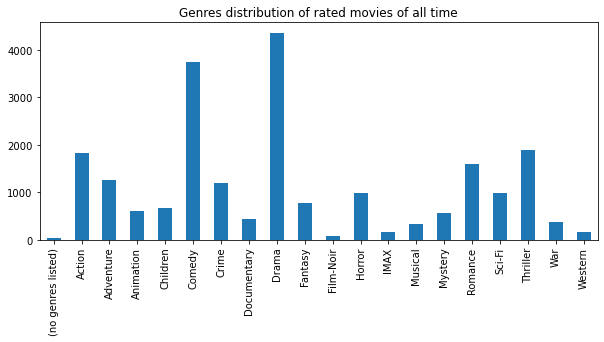

In [32]:
# Plot genres distribution
plt.figure(figsize=(10,4))
genres_dist.plot(kind="bar", title="Genres distribution of rated movies of all time")
plt.show()

<u>What genres could there be in the 1920s? Let's compare to the genres of last decade.</u>

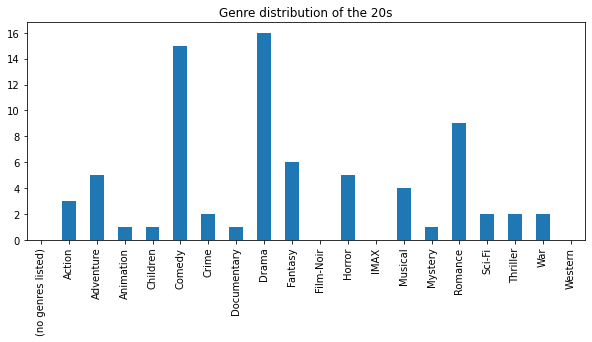

In [33]:
# Complete this

# Boolean series 
# subset only the 20's (1920-1929)
is_20s = (movies_prep.year>1919) & (movies_prep.year<1930)

# Bar plot
plt.figure(figsize=(10,4))
movies_prep.loc[is_20s,"(no genres listed)":"Western"].sum(axis=0).plot(kind="bar", title="Genre distribution of the 20s")

plt.show()

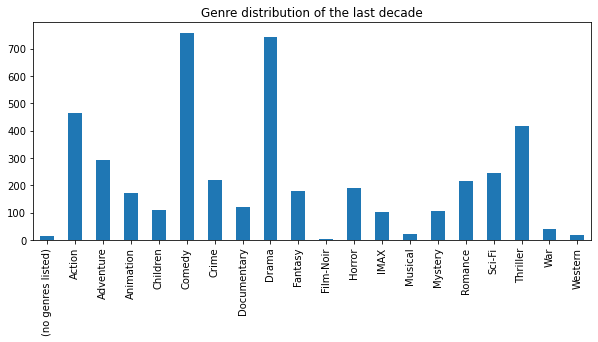

In [34]:
# Try it: now produce the genre distribution of the last decade (2010-2018, since 2018 is the latest available)

is_lastdecade = (movies_prep.year>2009) & (movies_prep.year<2019)

# Bar plot
plt.figure(figsize=(10,4))
movies_prep.loc[is_lastdecade,"(no genres listed)":"Western"].sum(axis=0).plot(kind="bar", title="Genre distribution of the last decade")

plt.show()

### Pie charts

<u>Let's use again the genres in the 20s, this time presenting it with a pie chart.</u>

In [35]:
# How about removing the zero entries first so we don't show the 0%?
genres_20s = movies_prep.loc[is_20s,"(no genres listed)":"Western"].sum(axis=0)

# Try it: remove the zero entries
genres_20s = genres_20s[genres_20s>0]

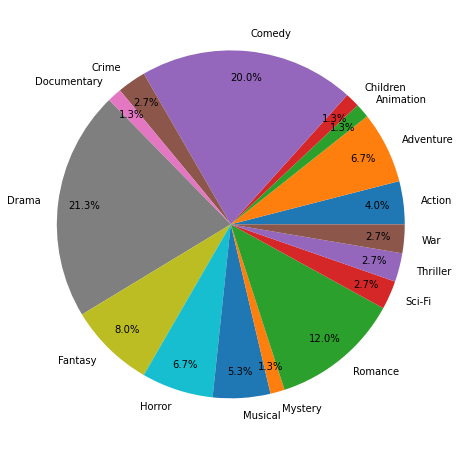

In [36]:
plt.figure(figsize=(8,8))

genres_20s.plot.pie(autopct='%1.1f%%', pctdistance=0.85);

plt.ylabel('')

# alternative: pass argument labels=None in pie() above and uncomment below and see what happens
# plt.legend(genres_dist.index, loc='right', bbox_to_anchor=(1.3, 0.5));

plt.show()

### Histogram

<u>Say we want to find out the distribution of the ratings given to the genre Fantasy. One option would be the following (you can also join the two DataFrames first)</u>:
- Get the `movieId` from `movies_prep` with genre Fantasy
- Get the ratings of `movieId` from `ratings_df`.
- Plot the distribution.

<u>How about doing something extra; compare with the distribution of the ratings given to the genre Musical!<br>
Complete the following cells.</u>

In [37]:
movies_prep.head(2)

,movieId,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,min,max,mean,median,count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1,1995,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0.5,5.0,3.920930,4.0,215.0
Jumanji (1995),2,1995,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0.5,5.0,3.431818,3.5,110.0


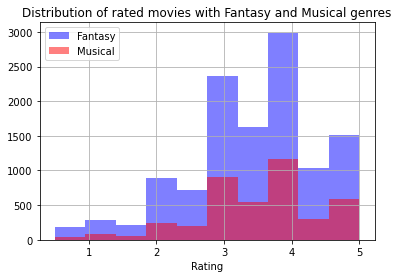

In [38]:
# Get the movieIds whose genre include Fantasy from movies_df

fantasy_movie_ids = movies_prep.loc[movies_prep.Fantasy==1].movieId
musical_movie_ids = movies_prep.loc[movies_prep.Musical==1].movieId

# Get the ratings from ratings_df, then call hist directly

# Fantasy
ratings_df[ratings_df.movieId.isin(fantasy_movie_ids)].rating.hist(alpha=0.5, color='b', label='Fantasy')

# Musical
ratings_df[ratings_df.movieId.isin(musical_movie_ids)].rating.hist(alpha=0.5, color='r', label='Musical')

# add descriptive title and xlabel
plt.title('Distribution of rated movies with Fantasy and Musical genres')
plt.xlabel('Rating')

plt.legend()
plt.show()

## Using Seaborn

<u>Seaborn package is useful for statistical plots. There are some datasets available to use.</u>

In [39]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

<u>For our examples, we'll use the [Auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).</u>

In [40]:
# Run this
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [41]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Linear Regression

<u>Let's see how mpg (miles per gallons) is related to horsepower.</u>

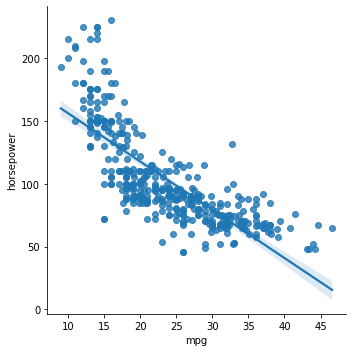

In [42]:
# the line you'll see is the linear regression line
sns.lmplot(x='mpg', y='horsepower', data=mpg_df)
plt.show()

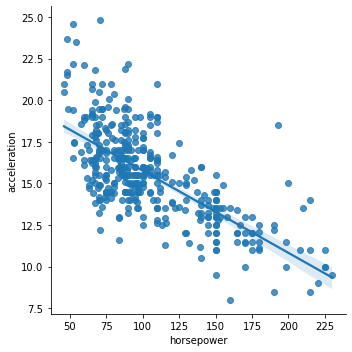

In [43]:
# Try it, how does horsepower affect acceleration?
sns.lmplot(x='horsepower', y='acceleration', data=mpg_df)
plt.show()

### Using `hue`

In [44]:
# Where do the cars come from?
mpg_df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

<u>Let's repeat the regression plot, this time by also differentiating the origin of the cars.</u>

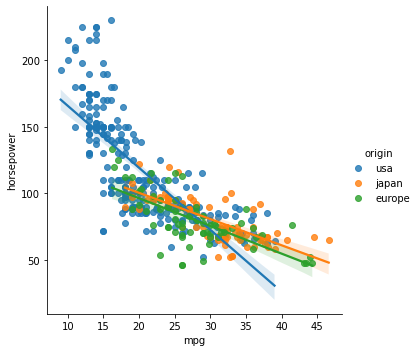

In [45]:
# using hue by origin
# complete this
sns.lmplot(x='mpg', y='horsepower', hue='origin', data=mpg_df)
plt.show()

<u>What can you (preliminarily) conclude?<br>
Try it below. You can add an argument, e.g. `palette='Set2'` to change the color theme. [More palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).</u>

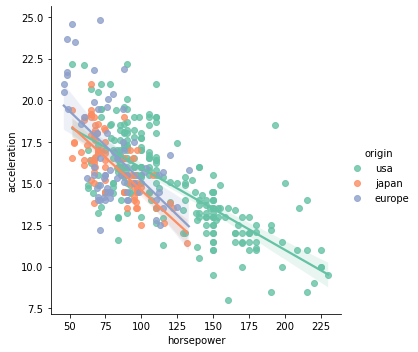

In [46]:
# Try it on acceleration vs horsepower, differentiating by origins
sns.lmplot(x='horsepower', y='acceleration', hue='origin', data=mpg_df, palette='Set2')
plt.show()

### Grouping by row or column

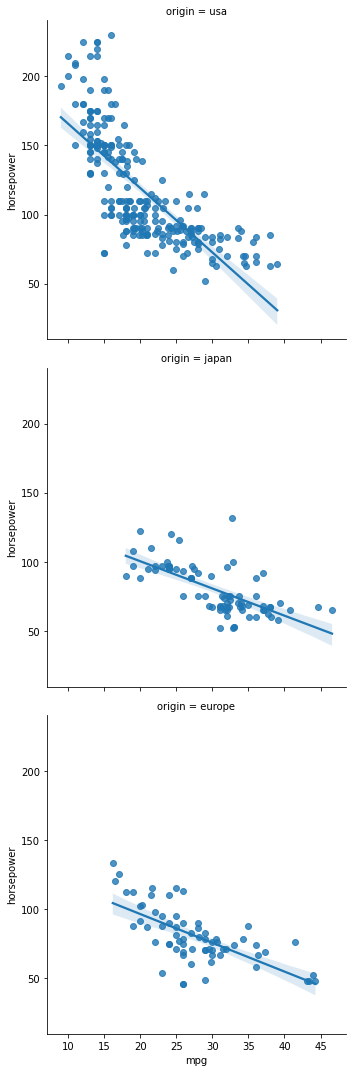

In [47]:
# Run this
sns.lmplot(x='mpg', y='horsepower', 
           row='origin', data=mpg_df)
plt.show()

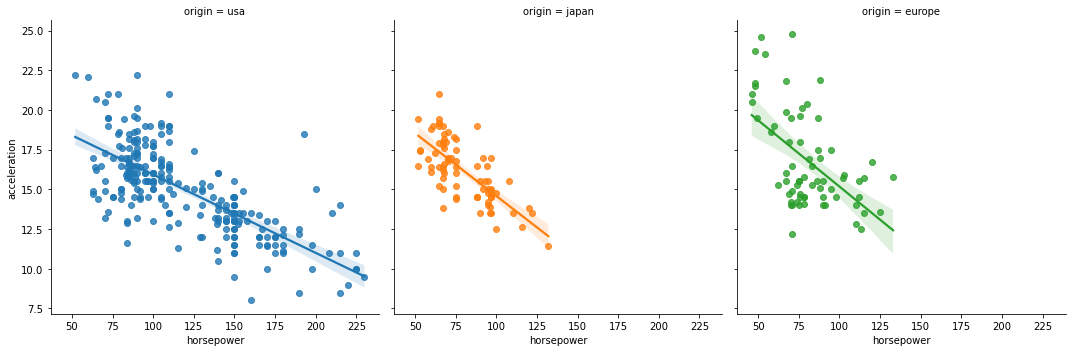

In [48]:
# Try it on acceleration vs horsepower, differentiating by origins,
# change row to col
#
sns.lmplot(x='horsepower', y='acceleration', hue='origin', 
           col='origin', data=mpg_df)
plt.show()


### Strip, swarm, violin plots

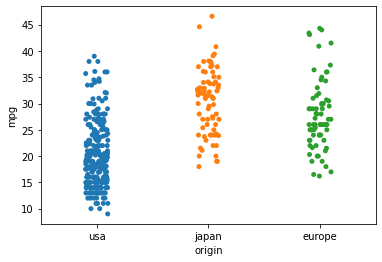

In [49]:
# Run this
sns.stripplot(x='origin', y='mpg', data=mpg_df)
plt.ylabel('mpg')
plt.xlabel('origin')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


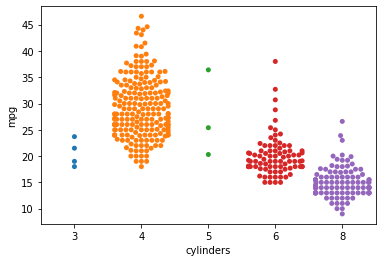

In [50]:
# Try it: simply replace stripplot with swarmplot
# try with different combinations of x- and y- data

sns.swarmplot(x='cylinders', y='mpg', data=mpg_df)
plt.ylabel('mpg')
plt.xlabel('cylinders')
plt.show()

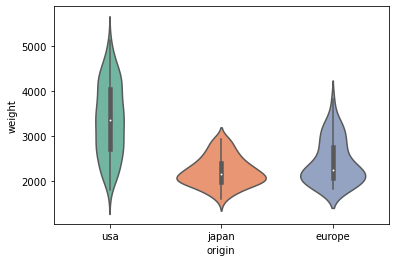

In [51]:
# Likewise with violinplot
#
sns.violinplot(x='origin', y='weight', data=mpg_df, palette='Set2')
plt.ylabel('weight')
plt.xlabel('origin')
plt.show()

### Joint plot

<u>Perhaps fancier?</u>

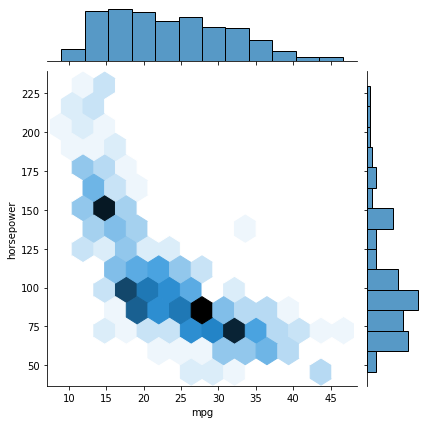

In [52]:
# Jointplot kind=“scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x='mpg', y='horsepower', kind='hex', data=mpg_df)
plt.show()

Try to change `kind` to one of these: `“scatter” | “reg” | “resid” | “kde” | “hex”`. [More info](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

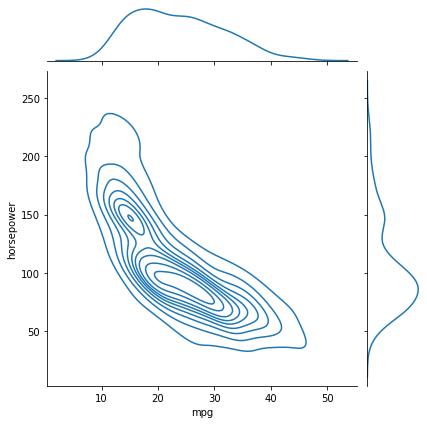

In [53]:
# Try with different combinations of x- and y- data
#
sns.jointplot(x='mpg', y='horsepower', kind='kde', data=mpg_df)

plt.show()

### Pair plot

<u>Plotting all against each other for a quick overview.</u>

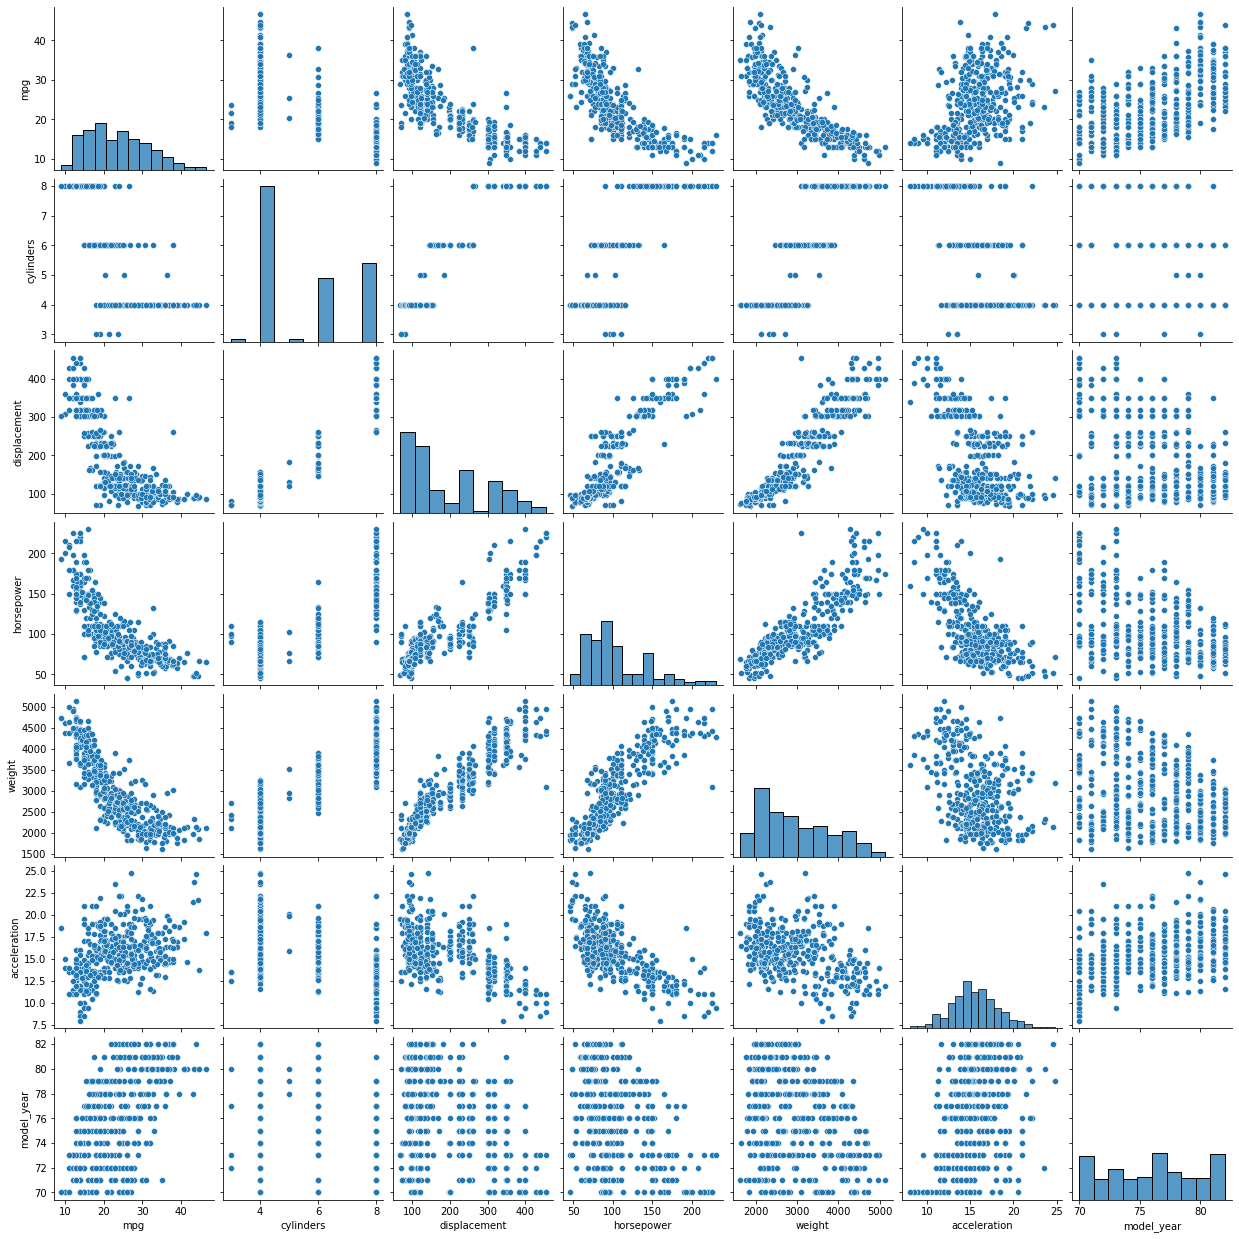

In [54]:
# Not a good idea for a big data set, you may see a RunTimeWarning!
sns.pairplot(mpg_df)
plt.show()

<u>Try it: load a different data set from seaborn and generate an overview of all variables against each other.
You can add options like `kind='reg'` to add regression lines, and `hue='a_variable_name'` to group the plots. May take a while and generate a RunTimeWarning for a big dataset!</u>

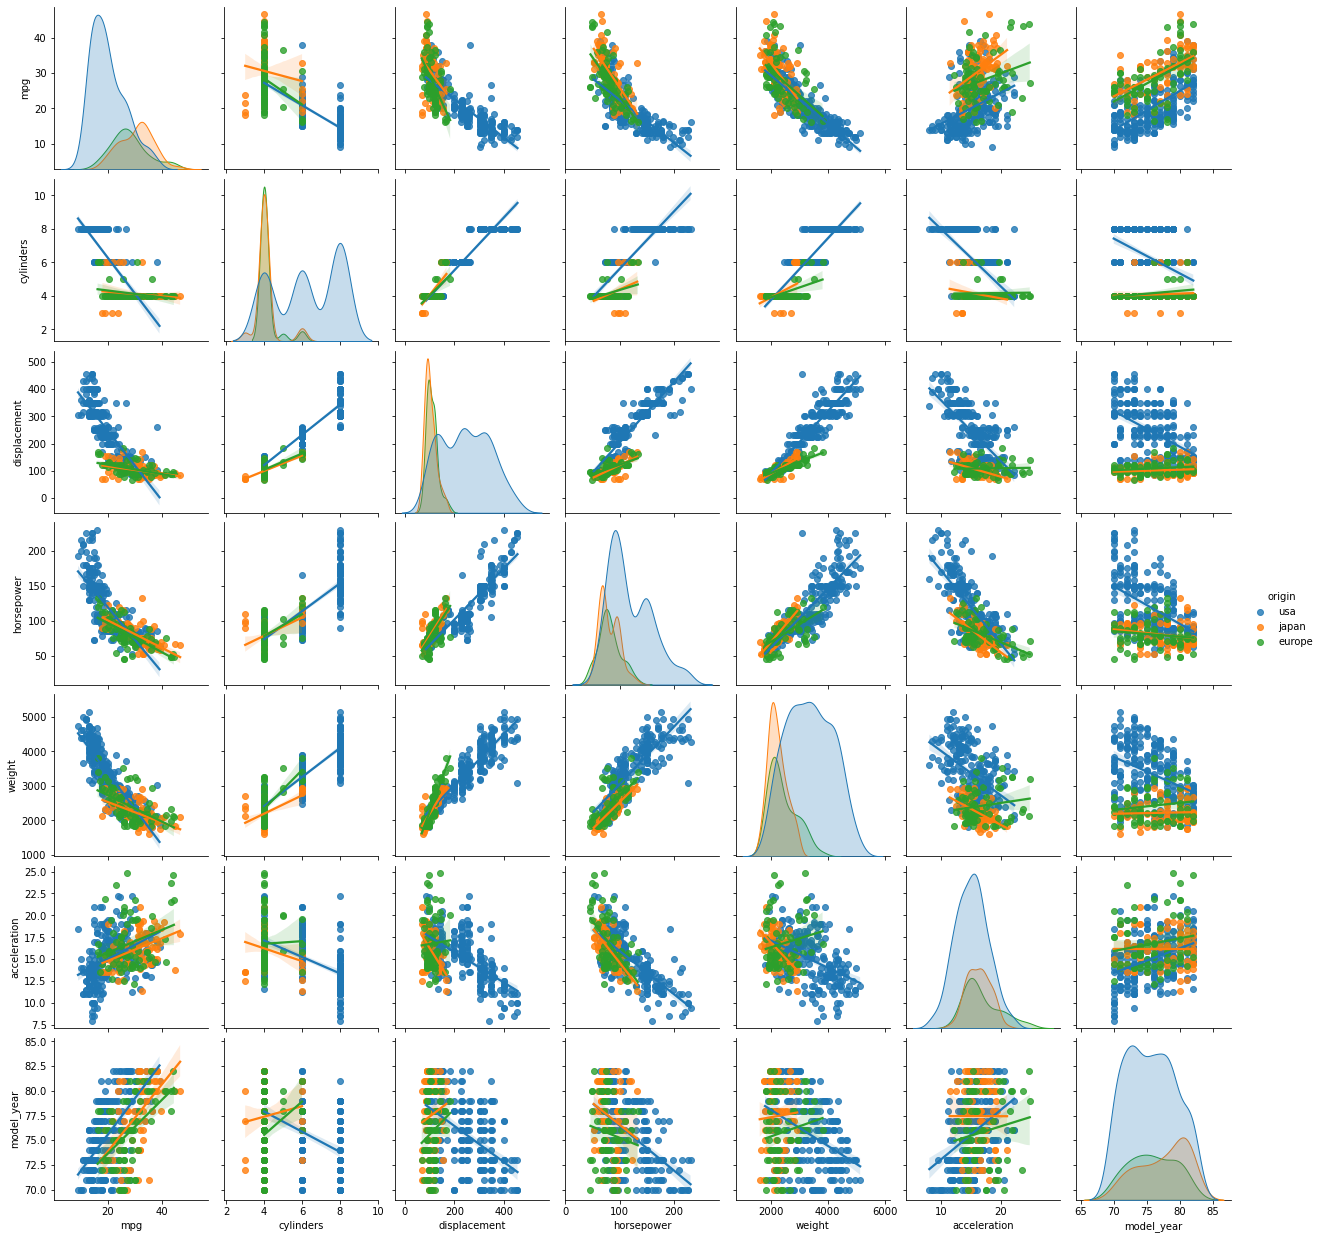

In [55]:
# Not a good idea for a big data set, you may see a RunTimeWarning!
sns.pairplot(mpg_df, hue='origin', kind='reg')
plt.show()